IMPORT LIBRARY DAN UPLOAD FILE CSV

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

#read the csv file into a dataframe
df = pd.read_csv("tessssssssss.csv")
df

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,1/8/2018,86,31,21,129,24,129,o3,TIDAK SEHAT,DKI5
1,2/8/2018,68,31,18,207,20,207,o3,SANGAT TIDAK SEHAT,DKI5
2,3/8/2018,68,32,16,211,17,211,o3,SANGAT TIDAK SEHAT,DKI2
3,4/8/2018,59,31,16,194,16,194,o3,TIDAK SEHAT,DKI5
4,5/8/2018,65,35,14,203,16,203,o3,SANGAT TIDAK SEHAT,DKI2
...,...,...,...,...,...,...,...,...,...,...
1283,12/27/2021,75,61,23,40,47,75,pm10,TIDAK SEHAT,DKI4
1284,12/28/2021,59,53,16,34,33,59,pm10,SEDANG,DKI4
1285,12/29/2021,61,54,15,37,29,61,pm10,SEDANG,DKI4
1286,12/30/2021,60,53,17,38,44,60,pm10,TIDAK SEHAT,DKI4


MELIHAT JUMLAH DATA SECARA BARIS DAN KOLOM

In [2]:
df.shape

(1288, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      1288 non-null   object
 1   pm10         1288 non-null   int64 
 2   so2          1288 non-null   int64 
 3   co           1288 non-null   int64 
 4   o3           1288 non-null   int64 
 5   no2          1288 non-null   int64 
 6   max          1288 non-null   int64 
 7   critical     1288 non-null   object
 8   categori     1288 non-null   object
 9   lokasi_spku  1288 non-null   object
dtypes: int64(6), object(4)
memory usage: 100.8+ KB


MELIHAT CUPLIKAN DARI DATA

In [4]:
df.head()

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,1/8/2018,86,31,21,129,24,129,o3,TIDAK SEHAT,DKI5
1,2/8/2018,68,31,18,207,20,207,o3,SANGAT TIDAK SEHAT,DKI5
2,3/8/2018,68,32,16,211,17,211,o3,SANGAT TIDAK SEHAT,DKI2
3,4/8/2018,59,31,16,194,16,194,o3,TIDAK SEHAT,DKI5
4,5/8/2018,65,35,14,203,16,203,o3,SANGAT TIDAK SEHAT,DKI2


MEMBAGI DATA MENJADI DATA TRAIN DAN TEST

In [5]:
train,test = train_test_split(df, test_size=0.2, random_state=1 )

In [6]:
print(train.shape,test.shape)

(1030, 10) (258, 10)


MENGOLAH DATA TRAIN

In [7]:
train.isnull().sum()

tanggal        0
pm10           0
so2            0
co             0
o3             0
no2            0
max            0
critical       0
categori       0
lokasi_spku    0
dtype: int64

In [8]:
train.describe()

,pm10,so2,co,o3,no2,max
count,1030.000000,1030.00000,1030.000000,1030.000000,1030.000000,1030.000000
mean,63.058252,35.32233,21.604854,91.249515,19.804854,96.498058
std,15.044621,13.50143,10.067227,45.291120,11.960730,41.162286
min,21.000000,13.00000,0.000000,20.000000,3.000000,41.000000
25%,55.000000,25.00000,16.000000,55.000000,13.000000,66.000000
50%,64.000000,31.00000,20.000000,80.000000,16.000000,83.000000
75%,72.000000,43.00000,25.000000,119.000000,22.000000,119.000000
max,179.000000,126.00000,88.000000,243.000000,104.000000,243.000000


EXPLORATORY DATA ANALYST

Text(0.5, 1.0, 'Features Correlating with Max')

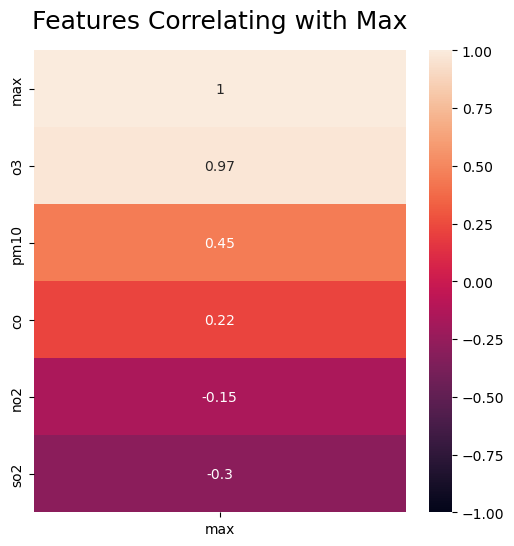

In [9]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(train.corr()[['max']].sort_values(by='max', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Max', fontdict={'fontsize':18}, pad=16)

In [10]:
pollutants = ['co','no2', 'o3', 'so2', 'pm10']

In [11]:
# Correlation Between Pollutants
correlation_matrix = train[pollutants].corr()
fig = px.imshow(correlation_matrix, x=pollutants, 
                 y=pollutants, title="Correlation Between Pollutants")
fig.show()

In [12]:
kategori_colors = {
    'BAIK': 'blue',
    'SANGAT TIDAK SEHAT': 'red',
    'SEDANG': 'green',
    'TIDAK SEHAT': 'purple'
}

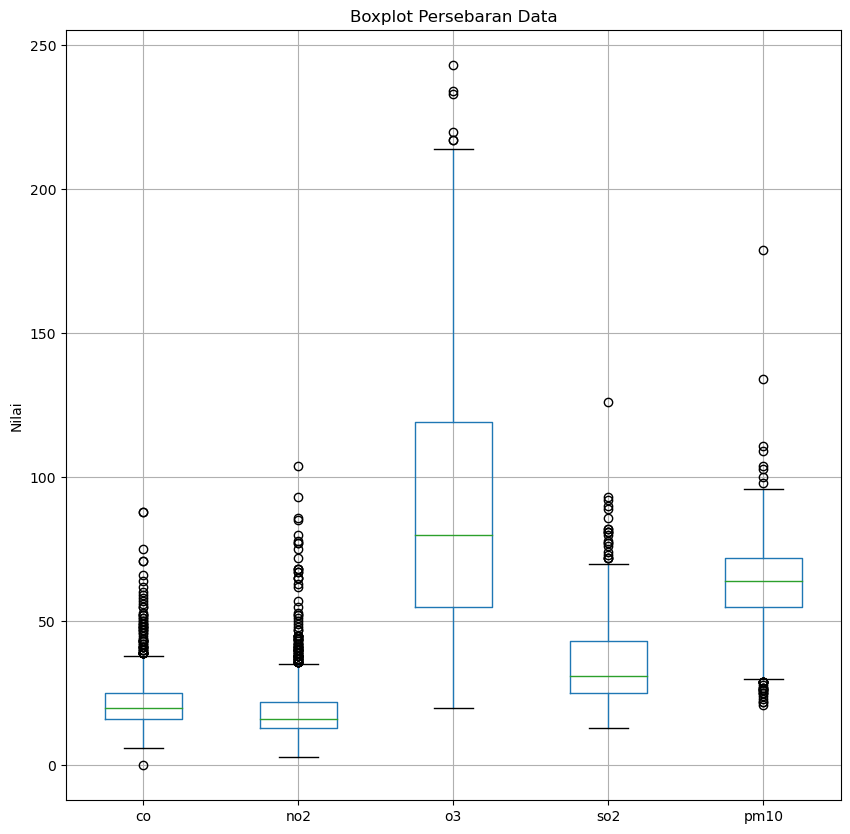

In [13]:
plt.figure(figsize=(10, 10))
train.boxplot(column=['co','no2', 'o3', 'so2', 'pm10'])

# Menambahkan label
plt.title('Boxplot Persebaran Data')
plt.ylabel('Nilai')

# Tampilkan boxplot
plt.show()

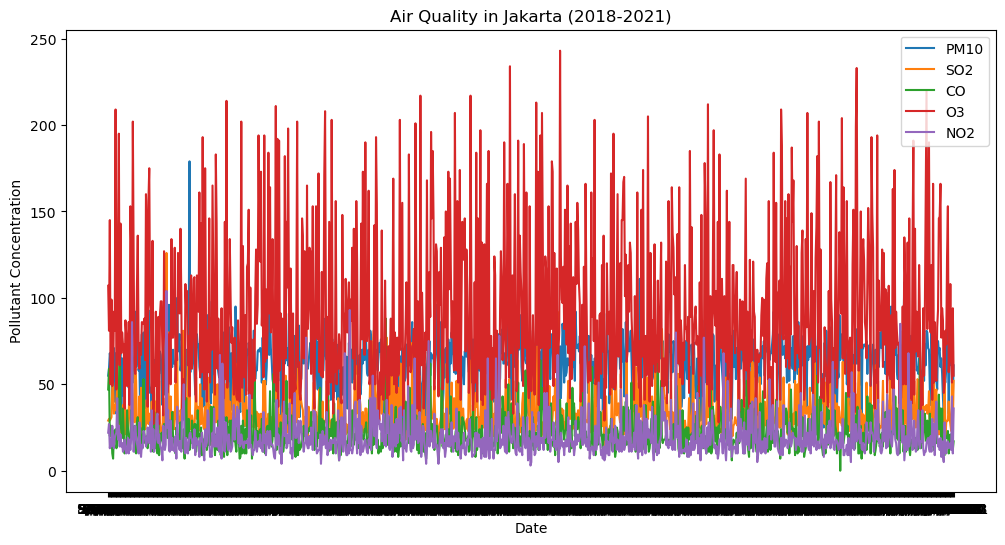

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x='tanggal', y='pm10', label='PM10')
sns.lineplot(data=train, x='tanggal', y='so2', label='SO2')
sns.lineplot(data=train, x='tanggal', y='co', label='CO')
sns.lineplot(data=train, x='tanggal', y='o3', label='O3')
sns.lineplot(data=train, x='tanggal', y='no2', label='NO2')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('Air Quality in Jakarta (2018-2021)')
plt.legend()
plt.show()

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



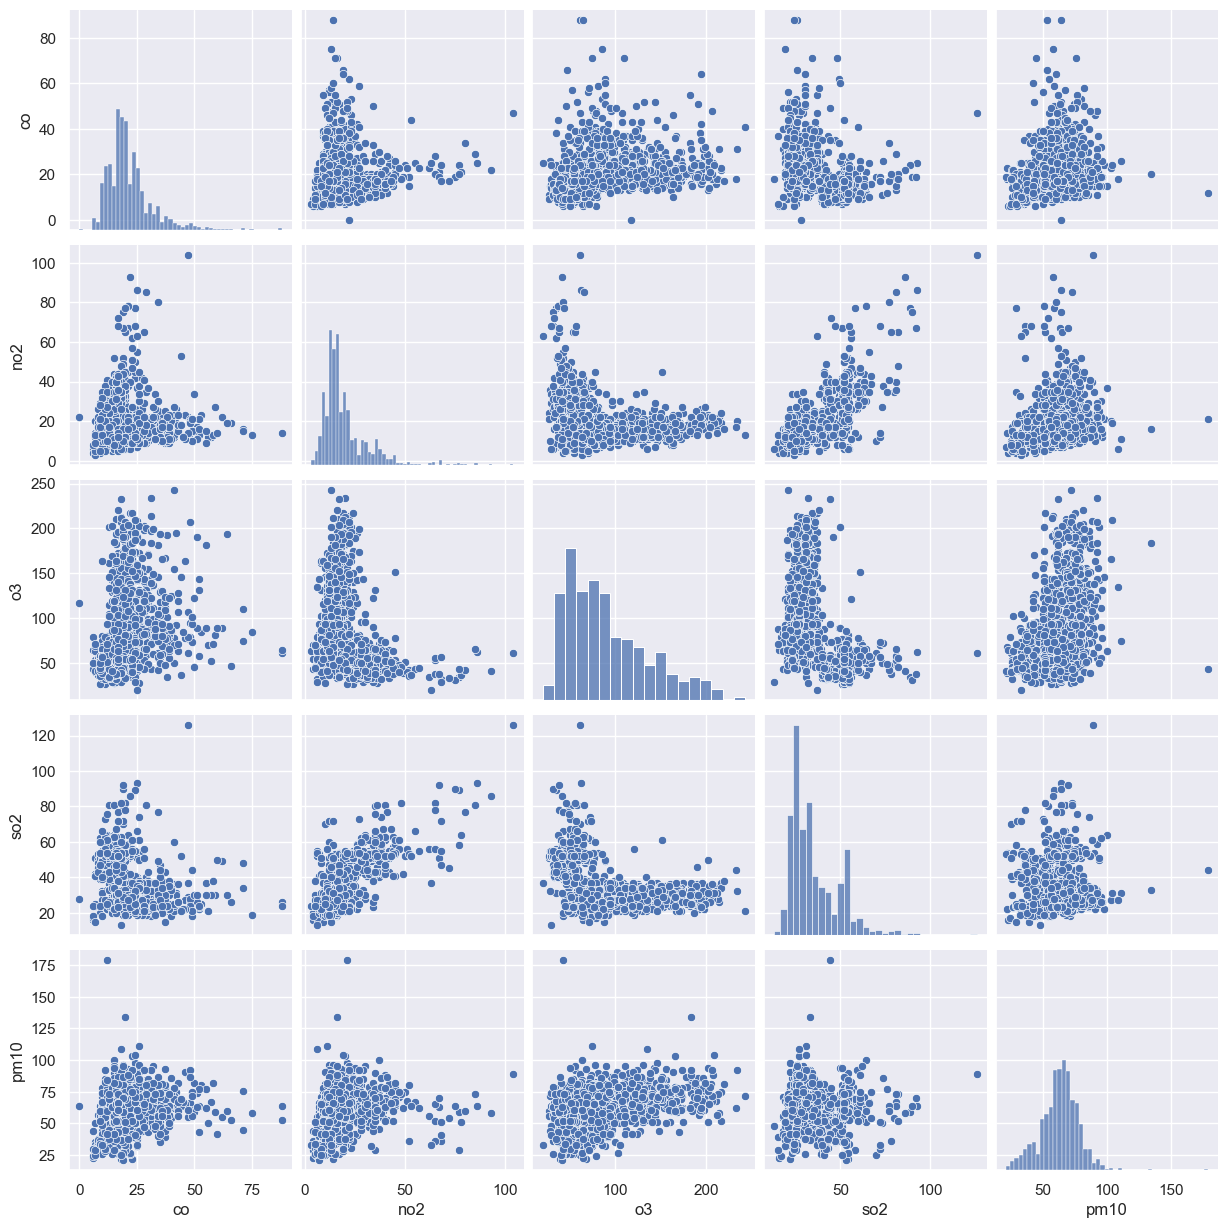

In [15]:
sns.set()
sns.pairplot(train[pollutants], size = 2.5)
plt.show()

In [16]:
# Define pollutants and their colors
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = train[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Jakarta",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="pollutants")

fig.show()

MENGOLAH SKEWNESS

In [17]:
train.skew()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13128\3574648760.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



pm10    0.243356
so2     1.417468
co      1.954121
o3      0.891595
no2     2.484132
max     1.089261
dtype: float64

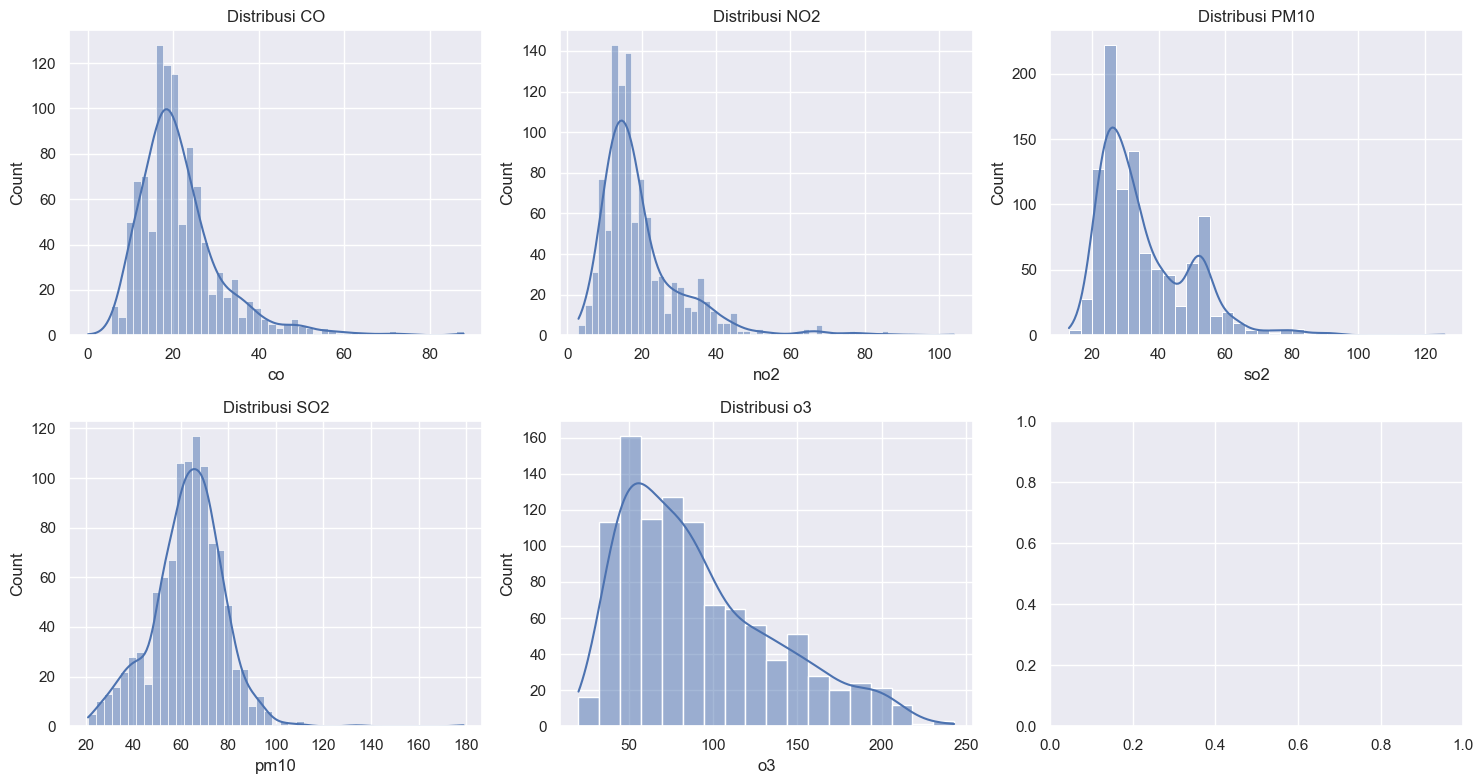

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Plot histogram untuk setiap kolom
sns.histplot(train['co'], kde=True, ax=axes[0, 0]).set(title=f'Distribusi CO')
sns.histplot(train['no2'], kde=True, ax=axes[0, 1]).set(title=f'Distribusi NO2')
sns.histplot(train['so2'], kde=True, ax=axes[0, 2]).set(title=f'Distribusi PM10')
sns.histplot(train['pm10'], kde=True, ax=axes[1, 0]).set(title=f'Distribusi SO2')
sns.histplot(train['o3'], kde=True, ax=axes[1, 1]).set(title=f'Distribusi o3')

# Box plot untuk melihat distribusi lebih lanjut
#sns.boxplot(x=nama_kolom_co, data=df, ax=axes[1, 2]).set(title=f'Box Plot {nama_kolom_co}')

# Sesuaikan tata letak subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

In [19]:
def outlieratas(column_name):
    Q1=train[column_name].quantile(0.25)
    Q3=df[column_name].quantile(0.75)
    IQR=Q3-Q1
    Upper_Whisker = Q3+1.5*IQR
    return Upper_Whisker

def outlierbawah(column_name):
    Q1=train[column_name].quantile(0.25)
    Q3=df[column_name].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1-1.5*IQR
    return Lower_Whisker


In [20]:
train.drop(train[train['co'] == 88].index, inplace=True)
train.drop(train[train['so2'] == 126].index, inplace=True)
train.drop(train[train['pm10'] == 179].index, inplace=True)
train.drop(train[train['o3'] == 243].index, inplace=True)
train.drop(train[train['no2'] == 93].index, inplace=True)
train['co'] = train['co'].replace(0, train['co'].median())

In [21]:
def handle_positive_outliers(column_name):
    outlier_threshold = outlieratas(column_name)
    outlier_mask = train[column_name] > outlier_threshold

    # Hitung mean dari kolom (tanpa outlier)
    mean_value = train[~outlier_mask][column_name].mean()

    # Ganti nilai outlier dengan mean
    train.loc[outlier_mask, column_name] = mean_value

def handle_negative_outliers(column_name):
    outlier_threshold = outlierbawah(column_name)
    outlier_mask = train[column_name] < outlier_threshold

    # Hitung mean dari kolom (tanpa outlier)
    mean_value = train[~outlier_mask][column_name].mean()

    # Ganti nilai outlier dengan mean
    train.loc[outlier_mask, column_name] = mean_value


In [22]:
handle_positive_outliers('co')
handle_positive_outliers('no2')
handle_positive_outliers('so2')
handle_positive_outliers('o3')

In [23]:
train['co']= np.sqrt(train['co'])
train['so2']= np.log1p(train['so2'])
train[['o3','no2']]= train[['o3','no2']].apply(lambda x: np.log(x))
train.skew()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13128\1881596453.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



pm10   -0.199789
so2     0.362096
co      0.041238
o3      0.034836
no2    -0.194084
max     1.077909
dtype: float64

DATA PREPROCESSING

In [24]:
labelenc = LabelEncoder()

In [25]:
train['categori'] = labelenc.fit_transform(train['categori'])
train['categori'].unique()

array([3, 2, 1, 0])

In [26]:
train.head()

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
188,8/3/2018,55,3.401197,4.453928,4.672829,3.091042,107,o3,3,DKI5
189,9/3/2018,59,3.433987,4.453928,4.394449,3.295837,81,o3,2,DKI5
304,1/9/2018,68,3.401197,4.472136,4.976734,2.564949,145,o3,3,DKI5
776,2/6/2020,63,3.433987,5.099020,3.912023,2.890372,63,pm10,2,DKI2
694,9/15/2019,74,3.465736,4.690416,4.595120,2.639057,99,o3,2,DKI5


In [27]:
X = train.drop(columns=["categori","lokasi_spku","tanggal","critical"])
y = train[["categori"]]


In [28]:
testb = test.drop(columns=["categori","lokasi_spku","tanggal","critical"])

In [29]:
X

,pm10,so2,co,o3,no2,max
188,55,3.401197,4.453928,4.672829,3.091042,107
189,59,3.433987,4.453928,4.394449,3.295837,81
304,68,3.401197,4.472136,4.976734,2.564949,145
776,63,3.433987,5.099020,3.912023,2.890372,63
694,74,3.465736,4.690416,4.595120,2.639057,99
...,...,...,...,...,...,...
715,88,3.332205,4.582576,4.682131,2.772589,108
905,61,3.178054,4.123106,4.158883,2.484907,64
1096,66,3.970292,4.123106,3.931826,2.863688,66
235,42,3.258097,3.464102,4.543295,2.302585,94


In [30]:
y

,categori
188,3
189,2
304,3
776,2
694,2
...,...
715,3
905,2
1096,3
235,2


In [31]:
scaler = StandardScaler()

In [32]:
X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(testb)

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
print(x_train.shape, y_train.shape)

(819, 6) (819, 1)


In [35]:
print(x_test.shape,y_test.shape)

(205, 6) (205, 1)


In [36]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [37]:
training_score = []
testing_score = []

In [38]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1,average='macro'))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1,average='macro'))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1,average='macro'))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 92.6829268292683

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.9046504965622613
Recall Score of DecisionTreeClassifier() model is: 0.8988095238095238
F1 Score of DecisionTreeClassifier() model is: 0.901079898362507

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


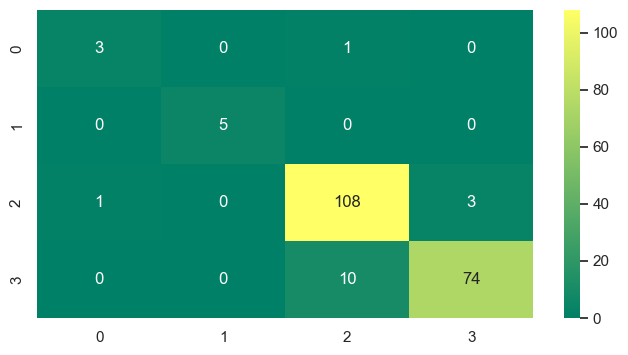

In [39]:
model_prediction(DecisionTreeClassifier())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13128\517314366.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 92.19512195121952

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.9058019713261649
Recall Score of RandomForestClassifier() model is: 0.8943452380952381
F1 Score of RandomForestClassifier() model is: 0.8981149500217297

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


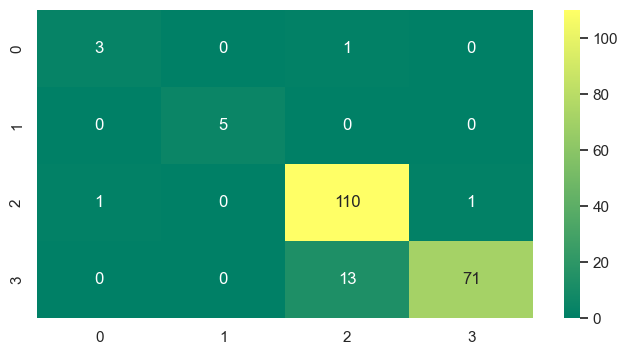

In [40]:
model_prediction(RandomForestClassifier())

Accuracy_Score of GaussianNB() model on Training Data is: 80.34188034188034
Accuracy_Score of GaussianNB() model on Testing Data is: 77.5609756097561

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.6636904761904762
Recall Score of GaussianNB() model is: 0.7691964285714286
F1 Score of GaussianNB() model is: 0.7041003536693192

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



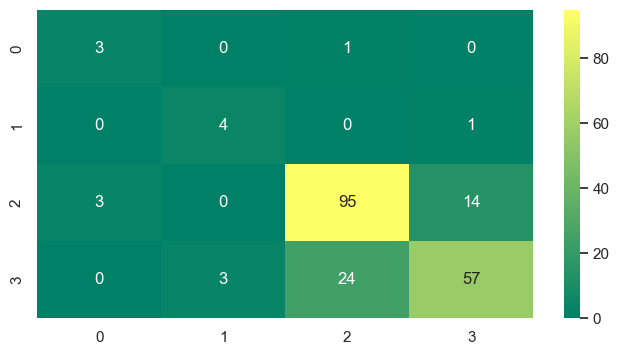

In [41]:
model_prediction(GaussianNB())

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, thi

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 91.45299145299145
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 87.3170731707317

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.9360779512294664
Recall Score of KNeighborsClassifier() model is: 0.6081845238095238
F1 Score of KNeighborsClassifier() model is: 0.6833305464206751

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


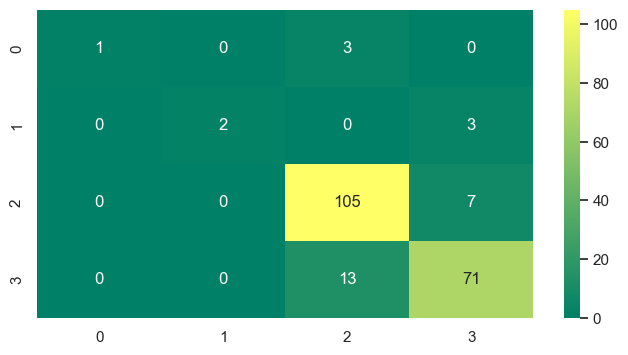

In [42]:
model_prediction(KNeighborsClassifier())

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy_Score of AdaBoostClassifier() model on Training Data is: 87.66788766788767
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 86.34146341463415

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.7
Recall Score of AdaBoostClassifier() model is: 0.6785714285714286
F1 Score of AdaBoostClassifier() model is: 0.6805555555555556

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


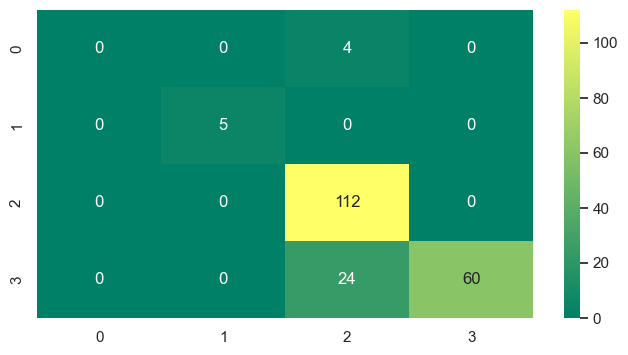

In [43]:
model_prediction(AdaBoostClassifier())

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 99.87789987789988
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 93.17073170731707

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.9080043859649123
Recall Score of GradientBoostingClassifier() model is: 0.9010416666666666
F1 Score of GradientBoostingClassifier() model is: 0.9036637931034484

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


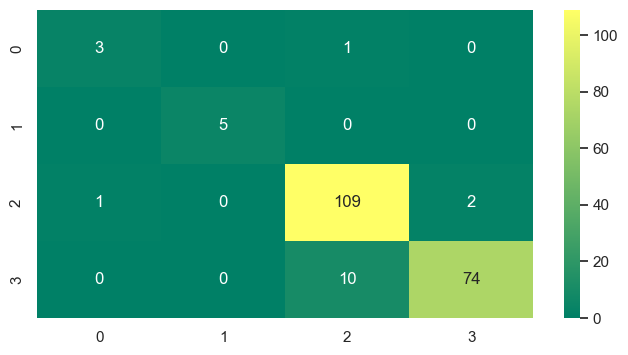

In [44]:
model_prediction(GradientBoostingClassifier())

In [45]:
model = GradientBoostingClassifier()

In [46]:
model.fit(x_train,y_train)
pred1 = model.predict(x_test)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [47]:
pred = model.predict(testb)


In [48]:
testb["categori"]= pred
testb.head()

,pm10,so2,co,o3,no2,max,categori
908,74,23,18,122,9,122,3
1087,69,53,13,58,26,69,2
491,71,47,16,132,25,132,3
267,57,25,21,77,15,77,2
460,56,27,27,86,10,86,2
